In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tempfile
import seaborn as sns
sns.set(style="darkgrid")

from banditpylib.bandits import LinearBandit
from banditpylib.arms import GaussianArm
from banditpylib.protocols import SinglePlayerProtocol, trial_data_messages_to_dict
from banditpylib.learners.linear_bandit_learner import LinUCB
from banditpylib.learners.mab_learner import UCB

In [2]:
num_arms = 100
horizon = 2000
delta = 1 / horizon
lambda_reg = 1e-3

In [3]:
features = [np.random.normal(0, size=5) for _ in range(num_arms)]
for i in range(len(features)):
  features[i] = features[i] / np.linalg.norm(features[i])

theta = np.random.normal(0, size=5)

In [4]:
bandit = LinearBandit(features, theta)
learners = [LinUCB(features, delta, lambda_reg), UCB(num_arms)]

In [5]:
intermediate_regrets = list(range(0, horizon+1, 50))
temp_file = tempfile.NamedTemporaryFile()

In [6]:
game = SinglePlayerProtocol(bandit, 
                            learners,
                            intermediate_regrets=intermediate_regrets,
                            horizon=horizon)

In [7]:
game.play(trials=200, output_filename=temp_file.name)

In [8]:
data_df = trial_data_messages_to_dict(temp_file.name)

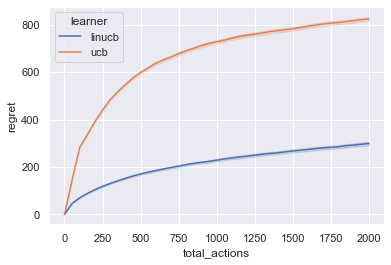

In [9]:
sns.lineplot(x='total_actions', y='regret', hue='learner', data=data_df)
plt.show()